In [1]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [2]:
pl.style.use('fabiostyle')
pl.rcParams['pdf.fonttype']=42
pl.rcParams['ps.fonttype']=42
# needs to find the library of functions
sys.path.append('../../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [3]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'decoding_vs_baseline_across_FIGURES'

In [4]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

Unable to restore variable 'add_significance', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'load_all_animals_vars', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'sig_vs_chance', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)


In [5]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [6]:
#mmc = multiple-comparisons correction (using bonferroni), where mcc = number of comparisons))

from matplotlib.lines import Line2D
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
    p = sig_func(array1, array2)[-1]
    sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=.5, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+1,
            'n.s.' if p > thresholds[0]/mcc else
            '*' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=5)
    return sig_value, p

In [7]:
def sig_vs_chance(ax, array1, chance, x1, y1, loops=15, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),colors='k'):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        p = sig_func(subtracted)[-1]
        sig_value = sig_func(subtracted)[0]
    elif sig_func is ttest:
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        p = sig_func(array1,chance)[-1]
        sig_value = sig_func(array1,chance)[0]
    ax.text(x1, y1,
            'n.s.' if p>thresholds[0] else
            '*' if p>thresholds[1] else
            '**' if p>thresholds[2] else
            '***',
            ha='center', fontsize=5, color=colors)
    return sig_value, p

In [25]:
def report_stats (array1, array2, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
        U = sig_func(array1, array2)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        p = sig_func(array1, array2)[-1]
        print "U =",U,"p =",p*mcc,"r =",r
    if sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_ind(x, y)
        cohens_d = (np.mean(array1)-np.mean(array2))/np.sqrt((np.std(array1)**2+np.std(array2)**2)/2)
        p = sig_func(array1, array2)[-1]
        print sig_func(array1, array2),"d =", cohens_d, 'corrected p =',p*mcc
    if sig_func is 'fishers':
        table = array1,array2
        sig_func = lambda x: sstats.fisher_exact(x, alternative='two-sided')
        p = sig_func(table)[-1]
        odds_ratio = sig_func(table)[0]
        print sig_func(table),"odd's ratio =", odds_ratio, 'corrected p =',p*mcc
        

def report_stats_chance (array1, chance=0.5, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        U = sig_func(subtracted)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        print sig_func(subtracted),"r =",r
    elif sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        cohens_d = (np.mean(array1)-chance)/np.std(array1)
        print sig_func(array1,chance),"d =",cohens_d

In [207]:
sessions = 'pre','post','pre_rev','post_rev','catch'

In [161]:
comparisons = 'preVSpost','preVSpre_rev','preVSpost_rev','postVSpre_rev','postVSpost_rev','pre_revVSpost_rev','postVScatch','post_revVScatch'

In [162]:
all_comparisons = 'preVSpost__patterns__pre',\
'preVSpost__patterns__post',\
'preVSpre_rev__patterns__pre',\
'preVSpre_rev__patterns__pre_rev',\
'preVSpost_rev__patterns__pre',\
'preVSpost_rev__patterns__post_rev',\
'postVSpre_rev__patterns__post',\
'postVSpre_rev__patterns__pre_rev',\
'postVSpost_rev__patterns__post',\
'postVSpost_rev__patterns__post_rev',\
'pre_revVSpost_rev__patterns__pre_rev',\
'pre_revVSpost_rev__patterns__post_rev',\
'postVScatch__patterns__post',\
'postVScatch__patterns__catch',\
'post_revVScatch__patterns__post_rev',\
'post_revVScatch__patterns__catch',\

In [163]:
all_comparisons_partners = 'post','pre','pre_rev','pre','post_rev','pre','pre_rev','post','post_rev','post','pre_rev','post_rev','catch','post','catch','post_rev'

In [164]:
AC = all_comparisons
ACP = all_comparisons_partners

for i in range(8,9): # only looking at post and post_rev here. For all comparisons, use range(0,len(AC),2):
    for t in range(14): # number of time bins
        for c in range(14):
            exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_CSm = {}'%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c))

In [186]:
for i in range(0,len(AC[:-4])): # only looking at post and post_rev here. For all comparisons, use range(0,len(AC),2):
    for t in range(14): # number of time bins
        for c in range(14):
            for cond in ['CSm','Rew','Sh']:
                for r in 'dhpc', 'vhpc':
                    #exec('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_%s_%s = {}'%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c,cond,r))
                    exec("baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_%s_%s = ut.load_variable('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_%s',\
                    '../notebooks/autorestore/decoding_vs_baseline_across_%s/')"%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c,cond,r,
                    AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c,cond,r))

In [187]:
for i in range(1,len(AC[:-4])): # only looking at post and post_rev here. For all comparisons, use range(0,len(AC),2):
    for t in range(14): # number of time bins
        for c in range(14):
            for cond in ['Rew','Sh']:
                for r in 'dhpc', 'vhpc':
                    #exec("baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_%s_CS_%s = {}"%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c,cond,r))
                    exec("baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_%s_CS_%s = ut.load_variable\
                    ('baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_%s_CS',\
                    '../notebooks/autorestore/decoding_vs_baseline_across_%s/')"%(AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c,cond,r,
                                                                                 AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,c,cond,r))

In [196]:
for i in range(0,len(AC[:-4]),2):
    for r in 'dhpc','vhpc':
        for t in range(14):
            for cond in ['Rew','Sh','CSm']:
                exec("mean_outcome_%s_tb_%s_vs_tb_%s_%s_%s = \
                np.mean([baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_%s_%s[:10],\
                baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_%s_%s[:10]],axis=0)"%(AC[i].split('__')[0],t,t,cond,r,
                  AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,t,cond,r,AC[i+1].split('__')[0],AC[i+1].split('__')[-1],ACP[i+1],
                  t,t,cond,r))

#get average of post-post_rev and post_rev-post
for tt in 'CSm','Rew','Sh':
    for r in 'dhpc','vhpc':
        for t in range(14):
            exec("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_%s_%s = \
            np.mean([baseline_scores_postVSpost_rev_post_w_post_rev_baselines_tb_%s_vs_tb_%s_%s_%s[:10],\
            baseline_scores_postVSpost_rev_post_rev_w_post_baselines_tb_%s_vs_tb_%s_%s_%s[:10]],axis=0)"%(t,t,tt,r,t,t,tt,r,t,t,tt,r))

In [191]:
for i in range(0,len(AC[:-4]),2):
    for r in 'dhpc','vhpc':
        for t in range(14):
            for cond in ['CSm','Rew_CS','Sh_CS']:
                exec("mean_odor_%s_tb_%s_vs_tb_%s_%s_%s = \
                np.mean([baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_%s_%s[:10],\
                baseline_scores_%s_%s_w_%s_baselines_tb_%s_vs_tb_%s_%s_%s[:10]],axis=0)"%(AC[i].split('__')[0],t,t,cond,r,
                  AC[i].split('__')[0],AC[i].split('__')[-1],ACP[i],t,t,cond,r,AC[i+1].split('__')[0],AC[i+1].split('__')[-1],ACP[i+1],
                  t,t,cond,r))

for tt in 'CSm','Rew_CS','Sh_CS':
    for r in 'vhpc','dhpc':
        for t in range(14):
            exec("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_%s_%s = \
            np.mean([baseline_scores_postVSpost_rev_post_w_post_rev_baselines_tb_%s_vs_tb_%s_%s_%s[:10],\
            baseline_scores_postVSpost_rev_post_rev_w_post_baselines_tb_%s_vs_tb_%s_%s_%s[:10]],axis=0)"%(t,t,tt,r,t,t,tt,r,t,t,tt,r))

# ONLY USE MEAN_ODOR WHEN COMPARING SESSIONS ACROSS REVERSAL!!!

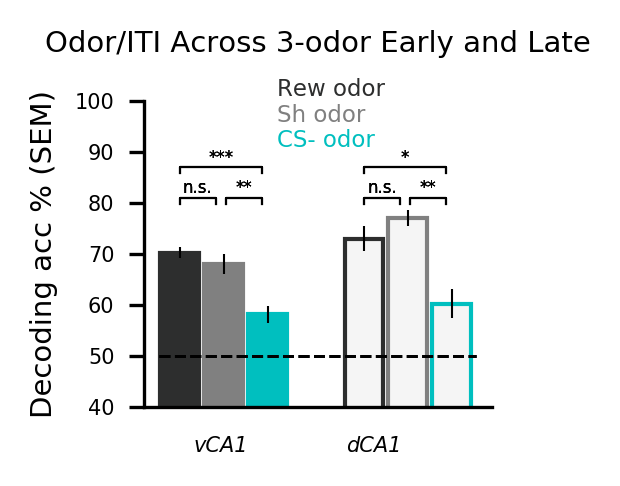

In [202]:
from matplotlib.patches import Patch
#labels = session_labels
#x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops = 10
v={}
d={}
pvs=[]

fig, ax = pl.subplots(1,1,figsize=(1.5,1.35),sharey=True)
for tb,l,per in zip([4],range(1),['Odor period']):
    for cond,c,i in zip(['Rew','Sh','CSm'],['#2D2E2E','gray','c'],range(3)):
        
        ax.bar(-.3 + width*i*1.13, np.mean(eval("mean_outcome_preVSpost_tb_%s_vs_tb_%s_%s_vhpc"%(tb,tb,cond))[:loops])*100,
                  width,edgecolor=c,color=c,label=cond,
                   yerr=np.array((np.std(eval("mean_outcome_preVSpost_tb_%s_vs_tb_%s_%s_vhpc"%(tb,tb,cond))[:loops])/(np.sqrt(loops-1)))*100))
        ax.bar(1.5 + width*i*1.13, np.mean(eval("mean_outcome_preVSpost_tb_%s_vs_tb_%s_%s_dhpc"%(tb,tb,cond))[:loops])*100,
                  width,edgecolor=c,color='whitesmoke',label=cond,
                   yerr=np.array((np.std(eval("mean_outcome_preVSpost_tb_%s_vs_tb_%s_%s_dhpc"%(tb,tb,cond))[:loops])/(np.sqrt(loops-1)))*100))
        ax.hlines(50,-.5,2.6, color='k', lw=.7, linestyles='dashed')
        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('Decoding acc % (SEM)')
        #ax.set_title('Decoding During CS')
        ax.set_xticks([0.1,1.6])
        ax.set_xticklabels(['vCA1','dCA1'],fontstyle='italic')
        #ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
        ax.tick_params(axis='x',bottom=False)
        ax.set_ylim(40,100)
        ax.set_title("Odor/ITI Across 3-odor Early and Late",y=1.08)
        
        for reg, r,p in zip(['vhpc','dhpc'],[0,1.2],[6,6]):
            pvs.append(add_significance(ax, eval("mean_outcome_preVSpost_tb_%s_vs_tb_%s_Rew_%s"%(tb,tb,reg))[:loops],
                eval("mean_outcome_preVSpost_tb_%s_vs_tb_%s_Sh_%s"%(tb,tb,reg))[:loops],-.3+(r*1.5),.05+(r*1.5),87-p,mcc=2))
            pvs.append(add_significance(ax, eval("mean_outcome_preVSpost_tb_%s_vs_tb_%s_CSm_%s"%(tb,tb,reg))[:loops],
                eval("mean_outcome_preVSpost_tb_%s_vs_tb_%s_Sh_%s"%(tb,tb,reg))[:loops],.15+(r*1.5),.5+(r*1.5),87-p,mcc=2))
            pvs.append(add_significance(ax, eval("mean_outcome_preVSpost_tb_%s_vs_tb_%s_CSm_%s"%(tb,tb,reg))[:loops],
                eval("mean_outcome_preVSpost_tb_%s_vs_tb_%s_Rew_%s"%(tb,tb,reg))[:loops],-.3+(r*1.5),.5+(r*1.5),93-p,mcc=2))
#            pvs.append(add_significance(ax, eval("mean_scores_gmin_tb_%s_shVScsm_%s['pre'][:loops]"%(tb,reg)),
#                   eval("mean_scores_gmin_tb_%s_shVScsm_%s['post'][:loops]"%(tb,reg)),
#                   -.3+(r*1.5),(r*1.5),100+(r*1.5),mcc=2))
#            pvs.append(add_significance(ax, eval("mean_scores_gmin_tb_%s_shVScsm_%s['post'][:loops]"%(tb,reg)),
#                   eval("mean_scores_gmin_tb_%s_shVScsm_%s['post_rev'][:loops]"%(tb,reg)),
#                   .15+(r*1.5),.42+(r*1.5),100+(r*1.5),mcc=2))
#            pvs.append(add_significance(ax, eval("mean_scores_gmin_tb_%s_shVScsm_%s['pre'][:loops]"%(tb,reg)),
#                   eval("mean_scores_gmin_tb_%s_shVScsm_%s['post_rev'][:loops]"%(tb,reg)),
#                   -.3+(r*1.5),.42+(r*1.5),106+(r*1.5),mcc=2))
#
#ax[0].legend([Patch(facecolor="#2D2E2E"),Patch(facecolor='grey'),Patch(facecolor='darkturquoise')],['Rew$\Rightarrow$Sh',
#                    'Sh$\Rightarrow$Rew','CS-$\Rightarrow$CS-'],loc=(.4,.8),frameon=False,handletextpad=0.3,labelspacing=0.2)
ax.text(.65,100+1,"Rew odor",color="#2D2E2E",fontsize=5.5)
ax.text(.65,95+1, "Sh odor",color="gray",fontsize=5.5)
ax.text(.65,90+1, "CS- odor",color="c",fontsize=5.5)


#pl.suptitle('Decoding Shock vs CS-',y=.87,fontsize=9.5,color='sandybrown')
#fig.tight_layout(pad=5)
#
fig.savefig('../figures/%s_gmin_bars_CS_dv_PrPo.pdf'%NOTEBOOK_NAME)

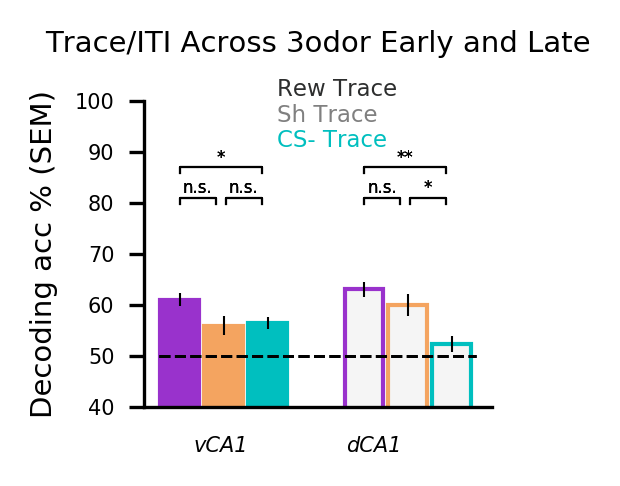

In [205]:
from matplotlib.patches import Patch
#labels = session_labels
#x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops = 10
v={}
d={}
pvs=[]

fig, ax = pl.subplots(1,1,figsize=(1.5,1.35),sharey=True)
for tb,l,per in zip([6],range(1),['Trace period']):
    for cond,c,i in zip(['Rew','Sh','CSm'],['darkorchid','sandybrown','c'],range(3)):
        
        ax.bar(-.3 + width*i*1.13, np.mean(eval("mean_outcome_preVSpost_tb_%s_vs_tb_%s_%s_vhpc"%(tb,tb,cond))[:loops])*100,
                  width,edgecolor=c,color=c,label=cond,
                   yerr=np.array((np.std(eval("mean_outcome_preVSpost_tb_%s_vs_tb_%s_%s_vhpc"%(tb,tb,cond))[:loops])/(np.sqrt(loops-1)))*100))
        ax.bar(1.5 + width*i*1.13, np.mean(eval("mean_outcome_preVSpost_tb_%s_vs_tb_%s_%s_dhpc"%(tb,tb,cond))[:loops])*100,
                  width,edgecolor=c,color='whitesmoke',label=cond,
                   yerr=np.array((np.std(eval("mean_outcome_preVSpost_tb_%s_vs_tb_%s_%s_dhpc"%(tb,tb,cond))[:loops])/(np.sqrt(loops-1)))*100))
        ax.hlines(50,-.5,2.6, color='k', lw=.7, linestyles='dashed')
        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('Decoding acc % (SEM)')
        #ax.set_title('Decoding During CS')
        ax.set_xticks([0.1,1.6])
        ax.set_xticklabels(['vCA1','dCA1'],fontstyle='italic')
        #ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
        ax.tick_params(axis='x',bottom=False)
        ax.set_ylim(40,100)
        ax.set_title("Trace/ITI Across 3odor Early and Late",y=1.08)
        
        for reg, r,p in zip(['vhpc','dhpc'],[0,1.2],[6,6]):
            pvs.append(add_significance(ax, eval("mean_outcome_preVSpost_tb_%s_vs_tb_%s_Rew_%s"%(tb,tb,reg))[:loops],
                eval("mean_outcome_preVSpost_tb_%s_vs_tb_%s_Sh_%s"%(tb,tb,reg))[:loops],-.3+(r*1.5),.05+(r*1.5),87-p,mcc=2))
            pvs.append(add_significance(ax, eval("mean_outcome_preVSpost_tb_%s_vs_tb_%s_CSm_%s"%(tb,tb,reg))[:loops],
                eval("mean_outcome_preVSpost_tb_%s_vs_tb_%s_Sh_%s"%(tb,tb,reg))[:loops],.15+(r*1.5),.5+(r*1.5),87-p,mcc=2))
            pvs.append(add_significance(ax, eval("mean_outcome_preVSpost_tb_%s_vs_tb_%s_CSm_%s"%(tb,tb,reg))[:loops],
                eval("mean_outcome_preVSpost_tb_%s_vs_tb_%s_Rew_%s"%(tb,tb,reg))[:loops],-.3+(r*1.5),.5+(r*1.5),93-p,mcc=2))
#            pvs.append(add_significance(ax, eval("mean_scores_gmin_tb_%s_shVScsm_%s['pre'][:loops]"%(tb,reg)),
#                   eval("mean_scores_gmin_tb_%s_shVScsm_%s['post'][:loops]"%(tb,reg)),
#                   -.3+(r*1.5),(r*1.5),100+(r*1.5),mcc=2))
#            pvs.append(add_significance(ax, eval("mean_scores_gmin_tb_%s_shVScsm_%s['post'][:loops]"%(tb,reg)),
#                   eval("mean_scores_gmin_tb_%s_shVScsm_%s['post_rev'][:loops]"%(tb,reg)),
#                   .15+(r*1.5),.42+(r*1.5),100+(r*1.5),mcc=2))
#            pvs.append(add_significance(ax, eval("mean_scores_gmin_tb_%s_shVScsm_%s['pre'][:loops]"%(tb,reg)),
#                   eval("mean_scores_gmin_tb_%s_shVScsm_%s['post_rev'][:loops]"%(tb,reg)),
#                   -.3+(r*1.5),.42+(r*1.5),106+(r*1.5),mcc=2))
#
#ax[0].legend([Patch(facecolor="#2D2E2E"),Patch(facecolor='grey'),Patch(facecolor='darkturquoise')],['Rew$\Rightarrow$Sh',
#                    'Sh$\Rightarrow$Rew','CS-$\Rightarrow$CS-'],loc=(.4,.8),frameon=False,handletextpad=0.3,labelspacing=0.2)
ax.text(.65,100+1,"Rew Trace",color="#2D2E2E",fontsize=5.5)
ax.text(.65,95+1, "Sh Trace",color="gray",fontsize=5.5)
ax.text(.65,90+1, "CS- Trace",color="c",fontsize=5.5)


#pl.suptitle('Decoding Shock vs CS-',y=.87,fontsize=9.5,color='sandybrown')
#fig.tight_layout(pad=5)
#
fig.savefig('../figures/%s_gmin_bars_tr_dv_PrPo.pdf'%NOTEBOOK_NAME)

vhpc Rw/Sh U = 42.5 p = 1.19229627974 r = -0.1792842914
None
vhpc sh/CS- U = 0.0 p = 0.000361269441615 r = -1.19522860933
None
vhpc rw/CS- U = 0.0 p = 0.000363302292183 r = -1.19522860933
None
dhpc Rw/Sh U = 36.0 p = 0.614250949565 r = -0.334664010614
None
dhpc sh/CS- U = 28.0 p = 0.20821977932 r = -0.525900588107
None
dhpc rw/CS- U = 39.5 p = 0.899042651534 r = -0.25099800796
None
vhpc Rw/Sh U = 42.5 p = 1.19229627974 r = -0.1792842914
None
vhpc sh/CS- U = 0.0 p = 0.000361269441615 r = -1.19522860933
None
vhpc rw/CS- U = 0.0 p = 0.000363302292183 r = -1.19522860933
None
dhpc Rw/Sh U = 36.0 p = 0.614250949565 r = -0.334664010614
None
dhpc sh/CS- U = 28.0 p = 0.20821977932 r = -0.525900588107
None
dhpc rw/CS- U = 39.5 p = 0.899042651534 r = -0.25099800796
None
vhpc Rw/Sh U = 42.5 p = 1.19229627974 r = -0.1792842914
None
vhpc sh/CS- U = 0.0 p = 0.000361269441615 r = -1.19522860933
None
vhpc rw/CS- U = 0.0 p = 0.000363302292183 r = -1.19522860933
None
dhpc Rw/Sh U = 36.0 p = 0.61425094956

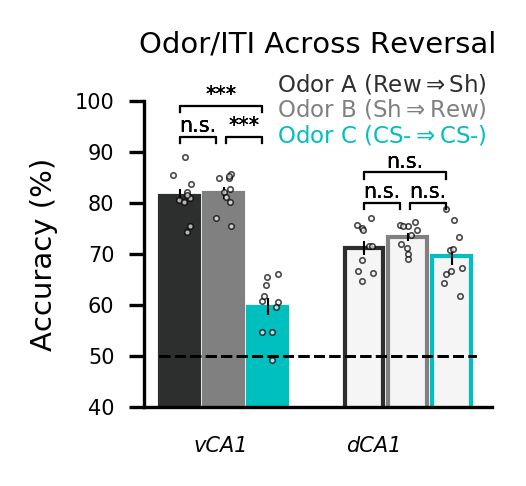

In [24]:
from matplotlib.patches import Patch
#labels = session_labels
#x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops = 10
v={}
d={}
pvs=[]

fig, ax = pl.subplots(1,1,figsize=(1.5,1.35),sharey=True)
for tb,l,per in zip([4],range(1),['Odor period']):
    for cond,c,i in zip(['Rew_CS','Sh_CS','CSm'],['#2D2E2E','gray','c'],range(3)):
        
        ax.bar(-.3 + width*i*1.13, np.mean(eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_%s_vhpc"%(tb,tb,cond))[:loops])*100,
                  width,edgecolor=c,color=c,label=cond,
                   yerr=np.array((np.std(eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_%s_vhpc"%(tb,tb,cond))[:loops])/(np.sqrt(loops-1)))*100))
        ax.scatter(-.3 + width*i*1.13+np.random.random(loops)*width/2-width/4.5, eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_%s_vhpc"%(tb,tb,cond))[:loops]*100, color='whitesmoke',
           s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
        ax.bar(1.5 + width*i*1.13, np.mean(eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_%s_dhpc"%(tb,tb,cond))[:loops])*100,
                  width,edgecolor=c,color='whitesmoke',label=cond,
                   yerr=np.array((np.std(eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_%s_dhpc"%(tb,tb,cond))[:loops])/(np.sqrt(loops-1)))*100))
        ax.scatter(1.5 + width*i*1.13+np.random.random(loops)*width/2-width/4.5, eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_%s_dhpc"%(tb,tb,cond))[:loops]*100, color='whitesmoke',
           s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
        ax.hlines(50,-.5,2.6, color='k', lw=.7, linestyles='dashed')
        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('Accuracy (%)')
        #ax.set_title('Decoding During CS')
        ax.set_xticks([0.1,1.6])
        ax.set_xticklabels(['vCA1','dCA1'],fontstyle='italic')
        #ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
        ax.tick_params(axis='x',bottom=False)
        ax.set_ylim(40,100)
        ax.set_title("Odor/ITI Across Reversal",y=1.08)
        
        for reg, r,p in zip(['vhpc','dhpc'],[0,1.2],[0,13]):
            pvs.append(add_significance(ax, eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_Rew_CS_%s"%(tb,tb,reg))[:loops],
                eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_Sh_CS_%s"%(tb,tb,reg))[:loops],-.3+(r*1.5),.05+(r*1.5),93-p,mcc=2))
            print reg,'Rw/Sh',report_stats( eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_Rew_CS_%s"%(tb,tb,reg))[:loops],
                eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_Sh_CS_%s"%(tb,tb,reg))[:loops],mcc=2)
            pvs.append(add_significance(ax, eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_CSm_%s"%(tb,tb,reg))[:loops],
                eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_Sh_CS_%s"%(tb,tb,reg))[:loops],.15+(r*1.5),.5+(r*1.5),93-p,mcc=2))
            print reg,'sh/CS-',report_stats( eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_CSm_%s"%(tb,tb,reg))[:loops],
                eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_Sh_CS_%s"%(tb,tb,reg))[:loops],mcc=2)
            pvs.append(add_significance(ax, eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_CSm_%s"%(tb,tb,reg))[:loops],
                eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_Rew_CS_%s"%(tb,tb,reg))[:loops],-.3+(r*1.5),.5+(r*1.5),99-p,mcc=2))
            print reg,'rw/CS-',report_stats( eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_CSm_%s"%(tb,tb,reg))[:loops],
                eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_Rew_CS_%s"%(tb,tb,reg))[:loops],mcc=2)
            
#            pvs.append(add_significance(ax, eval("mean_scores_gmin_tb_%s_shVScsm_%s['pre'][:loops]"%(tb,reg)),
#                   eval("mean_scores_gmin_tb_%s_shVScsm_%s['post'][:loops]"%(tb,reg)),
#                   -.3+(r*1.5),(r*1.5),100+(r*1.5),mcc=2))
#            pvs.append(add_significance(ax, eval("mean_scores_gmin_tb_%s_shVScsm_%s['post'][:loops]"%(tb,reg)),
#                   eval("mean_scores_gmin_tb_%s_shVScsm_%s['post_rev'][:loops]"%(tb,reg)),
#                   .15+(r*1.5),.42+(r*1.5),100+(r*1.5),mcc=2))
#            pvs.append(add_significance(ax, eval("mean_scores_gmin_tb_%s_shVScsm_%s['pre'][:loops]"%(tb,reg)),
#                   eval("mean_scores_gmin_tb_%s_shVScsm_%s['post_rev'][:loops]"%(tb,reg)),
#                   -.3+(r*1.5),.42+(r*1.5),106+(r*1.5),mcc=2))
#
#ax[0].legend([Patch(facecolor="#2D2E2E"),Patch(facecolor='grey'),Patch(facecolor='darkturquoise')],['Rew$\Rightarrow$Sh',
#                    'Sh$\Rightarrow$Rew','CS-$\Rightarrow$CS-'],loc=(.4,.8),frameon=False,handletextpad=0.3,labelspacing=0.2)
ax.text(.65,100+2,"Odor A (Rew$\Rightarrow$Sh)",color="#2D2E2E",fontsize=5.5)
ax.text(.65,95+2,"Odor B (Sh$\Rightarrow$Rew)",color="gray",fontsize=5.5)
ax.text(.65,90+2,"Odor C (CS-$\Rightarrow$CS-)",color="c",fontsize=5.5)


#pl.suptitle('Decoding Shock vs CS-',y=.87,fontsize=9.5,color='sandybrown')
#fig.tight_layout(pad=5)
#
fig.savefig('../figures/%s_gmin_bars_CS_dv.pdf'%NOTEBOOK_NAME)

vhpc Rw/Sh U = 100.0 p = 0.000361269441615 r = 0.845154254729
None
vhpc sh/CS- U = 53.0 p = 1.6997670174 r = 0.0507092552837
None
vhpc rw/CS- U = 0.0 p = 0.000365343582219 r = -0.845154254729
None
dhpc Rw/Sh U = 100.0 p = 0.000363302292183 r = 0.845154254729
None
dhpc sh/CS- U = 49.0 p = 1.93969995399 r = -0.0169030850946
None
dhpc rw/CS- U = 0.0 p = 0.000363302292183 r = -0.845154254729
None
vhpc Rw/Sh U = 100.0 p = 0.000361269441615 r = 0.845154254729
None
vhpc sh/CS- U = 53.0 p = 1.6997670174 r = 0.0507092552837
None
vhpc rw/CS- U = 0.0 p = 0.000365343582219 r = -0.845154254729
None
dhpc Rw/Sh U = 100.0 p = 0.000363302292183 r = 0.845154254729
None
dhpc sh/CS- U = 49.0 p = 1.93969995399 r = -0.0169030850946
None
dhpc rw/CS- U = 0.0 p = 0.000363302292183 r = -0.845154254729
None
vhpc Rw/Sh U = 100.0 p = 0.000361269441615 r = 0.845154254729
None
vhpc sh/CS- U = 53.0 p = 1.6997670174 r = 0.0507092552837
None
vhpc rw/CS- U = 0.0 p = 0.000365343582219 r = -0.845154254729
None
dhpc Rw/Sh 

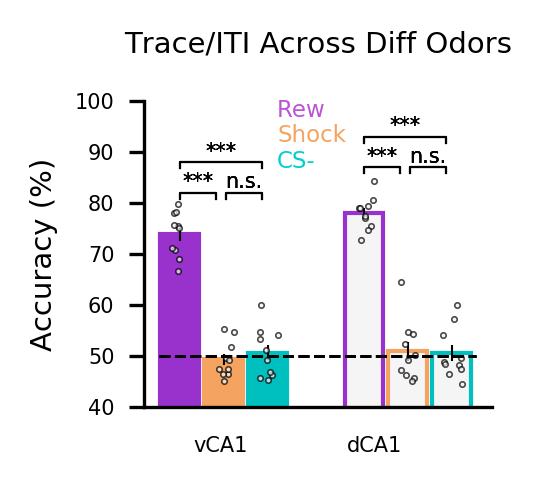

In [22]:
from matplotlib.patches import Patch
#labels = session_labels
#x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops = 10
v={}
d={}
pvs=[]

fig, ax = pl.subplots(1,1,figsize=(1.5,1.35))
for tb,l,per in zip([6],range(1),['Trace period']):
    for cond,c,i in zip(['Rew','Sh','CSm'],['darkorchid','sandybrown','c'],range(3)):
        
        ax.bar(-.3 + width*i*1.13, np.mean(eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_%s_vhpc"%(tb,tb,cond))[:loops])*100,
                  width,edgecolor=c,color=c,label=cond,
                   yerr=np.array((np.std(eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_%s_vhpc"%(tb,tb,cond))[:loops])/(np.sqrt(loops-1)))*100))
        ax.scatter(-.3 + width*i*1.13+np.random.random(loops)*width/2-width/4.5, eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_%s_vhpc"%(tb,tb,cond))[:loops]*100, color='whitesmoke',
           s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
        ax.bar(1.5 + width*i*1.13, np.mean(eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_%s_dhpc"%(tb,tb,cond))[:loops])*100,
                  width,edgecolor=c,color='whitesmoke',label=cond,
                   yerr=np.array((np.std(eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_%s_dhpc"%(tb,tb,cond))[:loops])/(np.sqrt(loops-1)))*100))
        ax.scatter(1.5 + width*i*1.13+np.random.random(loops)*width/2-width/4.5, eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_%s_dhpc"%(tb,tb,cond))[:loops]*100, color='whitesmoke',
           s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
        ax.hlines(50,-.5,2.6, color='k', lw=.7, linestyles='dashed')
        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('Accuracy (%)')
        #ax.set_title('Decoding During CS')
        ax.set_xticks([0.1,1.6])
        ax.set_xticklabels(['vCA1','dCA1'])
        #ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
        ax.tick_params(axis='x',bottom=False)
        ax.set_ylim(40,100)
        ax.set_title("Trace/ITI Across Diff Odors",y=1.08)

        for reg, r,p in zip(['vhpc','dhpc'],[0,1.2],[-2,-7]):
            pvs.append(add_significance(ax, eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Rew_%s"%(tb,tb,reg))[:loops],
                eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Sh_%s"%(tb,tb,reg))[:loops],-.3+(r*1.5),.05+(r*1.5),80-p,mcc=2))
            print reg,'Rw/Sh',report_stats( eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Rew_%s"%(tb,tb,reg))[:loops],
                eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Sh_%s"%(tb,tb,reg))[:loops],mcc=2)
            pvs.append(add_significance(ax, eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_CSm_%s"%(tb,tb,reg))[:loops],
                eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Sh_%s"%(tb,tb,reg))[:loops],.15+(r*1.5),.5+(r*1.5),80-p,mcc=2))
            print reg,'sh/CS-',report_stats( eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_CSm_%s"%(tb,tb,reg))[:loops],
                eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Sh_%s"%(tb,tb,reg))[:loops],mcc=2)
            pvs.append(add_significance(ax, eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_CSm_%s"%(tb,tb,reg))[:loops],
                eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Rew_%s"%(tb,tb,reg))[:loops],-.3+(r*1.5),.5+(r*1.5),86-p,mcc=2))
            print reg,'rw/CS-',report_stats( eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_CSm_%s"%(tb,tb,reg))[:loops],
                eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Rew_%s"%(tb,tb,reg))[:loops],mcc=2)
            
#ax[1].legend([Patch(facecolor="mediumorchid"),Patch(facecolor='sandybrown'),Patch(facecolor='darkturquoise')],['Rew',
#                    'Sh','CS-'],loc=(.2,.7),frameon=False)#pl.suptitle('Decoding Shock vs CS-',y=.87,fontsize=9.5,color='sandybrown')
ax.text(.65,1+96,"Rew",color="mediumorchid",fontsize=5.5)
ax.text(.65,1+91,"Shock",color="sandybrown",fontsize=5.5)
ax.text(.65,1+86,"CS-",color="darkturquoise",fontsize=5.5)

#fig.tight_layout(pad=5)
#
fig.savefig('../figures/%s_gmin_bars_tr_dv.pdf'%NOTEBOOK_NAME)

vhpc Rw/Sh U = 48.5 p = 1.8794407339 r = -0.0253546276419
None
vhpc sh/CS- U = 0.0 p = 0.000365343582219 r = -0.845154254729
None
vhpc rw/CS- U = 0.0 p = 0.000365343582219 r = -0.845154254729
None
dhpc Rw/Sh U = 100.0 p = 0.000365343582219 r = 0.845154254729
None
dhpc sh/CS- U = 4.5 p = 0.00133320172486 r = -0.769090371803
None
dhpc rw/CS- U = 0.0 p = 0.000365343582219 r = -0.845154254729
None
vhpc Rw/Sh U = 48.5 p = 1.8794407339 r = -0.0253546276419
None
vhpc sh/CS- U = 0.0 p = 0.000365343582219 r = -0.845154254729
None
vhpc rw/CS- U = 0.0 p = 0.000365343582219 r = -0.845154254729
None
dhpc Rw/Sh U = 100.0 p = 0.000365343582219 r = 0.845154254729
None
dhpc sh/CS- U = 4.5 p = 0.00133320172486 r = -0.769090371803
None
dhpc rw/CS- U = 0.0 p = 0.000365343582219 r = -0.845154254729
None
vhpc Rw/Sh U = 48.5 p = 1.8794407339 r = -0.0253546276419
None
vhpc sh/CS- U = 0.0 p = 0.000365343582219 r = -0.845154254729
None
vhpc rw/CS- U = 0.0 p = 0.000365343582219 r = -0.845154254729
None
dhpc Rw/S

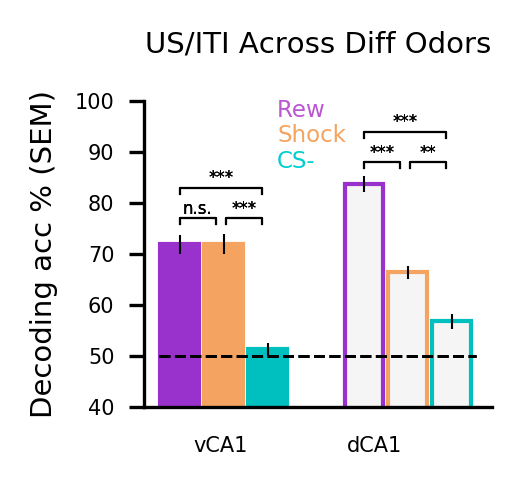

In [222]:
from matplotlib.patches import Patch
#labels = session_labels
#x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops = 10
v={}
d={}
pvs=[]

fig, ax = pl.subplots(1,1,figsize=(1.5,1.35))
for tb,l,per in zip([8],range(1),['US period']):
    for cond,c,i in zip(['Rew','Sh','CSm'],['darkorchid','sandybrown','c'],range(3)):
        
        ax.bar(-.3 + width*i*1.13, np.mean(eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_%s_vhpc"%(tb,tb,cond))[:loops])*100,
                  width,edgecolor=c,color=c,label=cond,
                   yerr=np.array((np.std(eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_%s_vhpc"%(tb,tb,cond))[:loops])/(np.sqrt(loops-1)))*100))
        ax.bar(1.5 + width*i*1.13, np.mean(eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_%s_dhpc"%(tb,tb,cond))[:loops])*100,
                  width,edgecolor=c,color='whitesmoke',label=cond,
                   yerr=np.array((np.std(eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_%s_dhpc"%(tb,tb,cond))[:loops])/(np.sqrt(loops-1)))*100))
        ax.hlines(50,-.5,2.6, color='k', lw=.7, linestyles='dashed')
        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('Decoding acc % (SEM)')
        #ax.set_title('Decoding During CS')
        ax.set_xticks([0.1,1.6])
        ax.set_xticklabels(['vCA1','dCA1'])
        #ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
        ax.tick_params(axis='x',bottom=False)
        ax.set_ylim(40,100)
        ax.set_title("US/ITI Across Diff Odors",y=1.08)

        for reg, r,p in zip(['vhpc','dhpc'],[0,1.2],[3,-8]):
            pvs.append(add_significance(ax, eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Rew_%s"%(tb,tb,reg))[:loops],
                eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Sh_%s"%(tb,tb,reg))[:loops],-.3+(r*1.5),.05+(r*1.5),80-p,mcc=2))
            print reg,'Rw/Sh',report_stats( eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Rew_%s"%(tb,tb,reg))[:loops],
                eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Sh_%s"%(tb,tb,reg))[:loops],mcc=2)
            pvs.append(add_significance(ax, eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_CSm_%s"%(tb,tb,reg))[:loops],
                eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Sh_%s"%(tb,tb,reg))[:loops],.15+(r*1.5),.5+(r*1.5),80-p,mcc=2))
            print reg,'sh/CS-',report_stats( eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_CSm_%s"%(tb,tb,reg))[:loops],
                eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Sh_%s"%(tb,tb,reg))[:loops],mcc=2)
            pvs.append(add_significance(ax, eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_CSm_%s"%(tb,tb,reg))[:loops],
                eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Rew_%s"%(tb,tb,reg))[:loops],-.3+(r*1.5),.5+(r*1.5),86-p,mcc=2))
            print reg,'rw/CS-',report_stats( eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_CSm_%s"%(tb,tb,reg))[:loops],
                eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Rew_%s"%(tb,tb,reg))[:loops],mcc=2)
            
#ax[1].legend([Patch(facecolor="mediumorchid"),Patch(facecolor='sandybrown'),Patch(facecolor='darkturquoise')],['Rew',
#                    'Sh','CS-'],loc=(.2,.7),frameon=False)#pl.suptitle('Decoding Shock vs CS-',y=.87,fontsize=9.5,color='sandybrown')
ax.text(.65,1+96,"Rew",color="mediumorchid",fontsize=5.5)
ax.text(.65,1+91,"Shock",color="sandybrown",fontsize=5.5)
ax.text(.65,1+86,"CS-",color="darkturquoise",fontsize=5.5)

#fig.tight_layout(pad=5)
#
fig.savefig('../figures/%s_gmin_bars_US_dv.pdf'%NOTEBOOK_NAME)

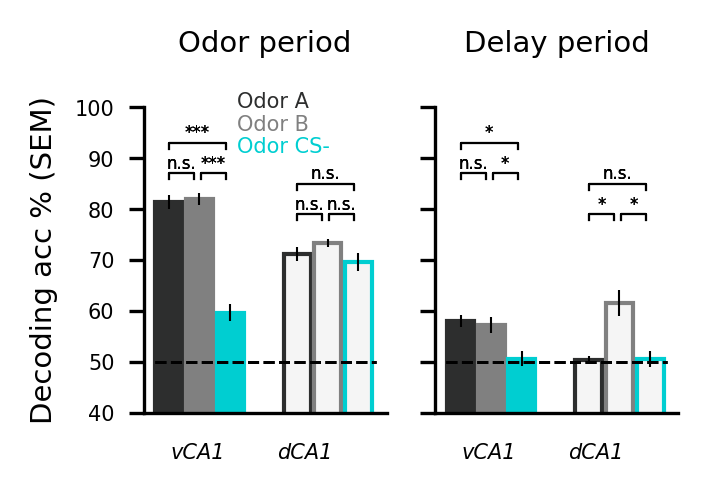

In [177]:
from matplotlib.patches import Patch
#labels = session_labels
#x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops = 10
v={}
d={}
pvs=[]

fig, ax = pl.subplots(1,2,figsize=(2.3,1.35),sharey=True)
for tb,l,per in zip([4,6],range(2),['Odor period','Delay period']):
    for cond,c,i in zip(['Rew_CS','Sh_CS','CSm'],['#2D2E2E','grey','darkturquoise'],range(3)):
        
        ax[l].bar(-.3 + width*i*1.13, np.mean(eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_%s_vhpc"%(tb,tb,cond))[:loops])*100,
                  width,edgecolor=c,color=c,label=cond,
                   yerr=np.array((np.std(eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_%s_vhpc"%(tb,tb,cond))[:loops])/(np.sqrt(loops-1)))*100))
        ax[l].bar(1.5 + width*i*1.13, np.mean(eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_%s_dhpc"%(tb,tb,cond))[:loops])*100,
                  width,edgecolor=c,color='whitesmoke',label=cond,
                   yerr=np.array((np.std(eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_%s_dhpc"%(tb,tb,cond))[:loops])/(np.sqrt(loops-1)))*100))
        ax[l].hlines(50,-.5,2.6, color='k', lw=.7, linestyles='dashed')
        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax[0].set_ylabel('Decoding acc % (SEM)')
        #ax.set_title('Decoding During CS')
        ax[l].set_xticks([0.1,1.6])
        ax[l].set_xticklabels(['vCA1','dCA1'],fontstyle='italic')
        #ax[l].legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
        ax[l].tick_params(axis='x',bottom=False)
        ax[l].set_ylim(40,100)
        ax[l].set_title(per,y=1.1)
        
        for reg, r,p in zip(['vhpc','dhpc'],[0,1.2],[0,8]):
            pvs.append(add_significance(ax[l], eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_Rew_CS_%s"%(tb,tb,reg))[:loops],
                eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_Sh_CS_%s"%(tb,tb,reg))[:loops],-.3+(r*1.5),.05+(r*1.5),87-p,mcc=2))
            pvs.append(add_significance(ax[l], eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_CSm_%s"%(tb,tb,reg))[:loops],
                eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_Sh_CS_%s"%(tb,tb,reg))[:loops],.15+(r*1.5),.5+(r*1.5),87-p,mcc=2))
            pvs.append(add_significance(ax[l], eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_CSm_%s"%(tb,tb,reg))[:loops],
                eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_Rew_CS_%s"%(tb,tb,reg))[:loops],-.3+(r*1.5),.5+(r*1.5),93-p,mcc=2))
#            pvs.append(add_significance(ax[l], eval("mean_scores_gmin_tb_%s_shVScsm_%s['pre'][:loops]"%(tb,reg)),
#                   eval("mean_scores_gmin_tb_%s_shVScsm_%s['post'][:loops]"%(tb,reg)),
#                   -.3+(r*1.5),(r*1.5),100+(r*1.5),mcc=2))
#            pvs.append(add_significance(ax[l], eval("mean_scores_gmin_tb_%s_shVScsm_%s['post'][:loops]"%(tb,reg)),
#                   eval("mean_scores_gmin_tb_%s_shVScsm_%s['post_rev'][:loops]"%(tb,reg)),
#                   .15+(r*1.5),.42+(r*1.5),100+(r*1.5),mcc=2))
#            pvs.append(add_significance(ax[l], eval("mean_scores_gmin_tb_%s_shVScsm_%s['pre'][:loops]"%(tb,reg)),
#                   eval("mean_scores_gmin_tb_%s_shVScsm_%s['post_rev'][:loops]"%(tb,reg)),
#                   -.3+(r*1.5),.42+(r*1.5),106+(r*1.5),mcc=2))
#
#ax[0].legend([Patch(facecolor="#2D2E2E"),Patch(facecolor='grey'),Patch(facecolor='darkturquoise')],['Rew$\Rightarrow$Sh',
#                    'Sh$\Rightarrow$Rew','CS-$\Rightarrow$CS-'],loc=(.4,.8),frameon=False,handletextpad=0.3,labelspacing=0.2)
ax[0].text(.65,100,"Odor A",color="#2D2E2E",fontsize=5)
ax[0].text(.65,95.5,"Odor B",color="grey",fontsize=5)
ax[0].text(.65,91,"Odor CS-",color="darkturquoise",fontsize=5)


#pl.suptitle('Decoding Shock vs CS-',y=.87,fontsize=9.5,color='sandybrown')
#fig.tight_layout(pad=5)
#
#fig.savefig('../figures/%s_gmin_bars_shVSCSm.pdf'%NOTEBOOK_NAME)

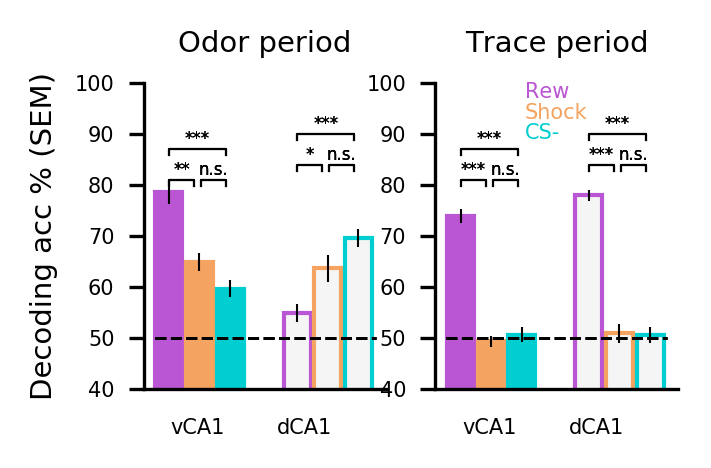

In [178]:
from matplotlib.patches import Patch
#labels = session_labels
#x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops = 10
v={}
d={}
pvs=[]

fig, ax = pl.subplots(1,2,figsize=(2.3,1.35),sharey=False)
for tb,l,per in zip([4,6],range(2),['Odor period','Trace period']):
    for cond,c,i in zip(['Rew','Sh','CSm'],['mediumorchid','sandybrown','darkturquoise'],range(3)):
        
        ax[l].bar(-.3 + width*i*1.13, np.mean(eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_%s_vhpc"%(tb,tb,cond))[:loops])*100,
                  width,edgecolor=c,color=c,label=cond,
                   yerr=np.array((np.std(eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_%s_vhpc"%(tb,tb,cond))[:loops])/(np.sqrt(loops-1)))*100))
        ax[l].bar(1.5 + width*i*1.13, np.mean(eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_%s_dhpc"%(tb,tb,cond))[:loops])*100,
                  width,edgecolor=c,color='whitesmoke',label=cond,
                   yerr=np.array((np.std(eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_%s_dhpc"%(tb,tb,cond))[:loops])/(np.sqrt(loops-1)))*100))
        ax[l].hlines(50,-.5,2.6, color='k', lw=.7, linestyles='dashed')
        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax[0].set_ylabel('Decoding acc % (SEM)')
        #ax.set_title('Decoding During CS')
        ax[l].set_xticks([0.1,1.6])
        ax[l].set_xticklabels(['vCA1','dCA1'])
        #ax[l].legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
        ax[l].tick_params(axis='x',bottom=False)
        ax[l].set_ylim(40,100)
        ax[l].set_title(per,y=1.02)

        for reg, r,p in zip(['vhpc','dhpc'],[0,1.2],[-1,-4]):
            pvs.append(add_significance(ax[l], eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Rew_%s"%(tb,tb,reg))[:loops],
                eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Sh_%s"%(tb,tb,reg))[:loops],-.3+(r*1.5),.05+(r*1.5),80-p,mcc=2))
            pvs.append(add_significance(ax[l], eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_CSm_%s"%(tb,tb,reg))[:loops],
                eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Sh_%s"%(tb,tb,reg))[:loops],.15+(r*1.5),.5+(r*1.5),80-p,mcc=2))
            pvs.append(add_significance(ax[l], eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_CSm_%s"%(tb,tb,reg))[:loops],
                eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Rew_%s"%(tb,tb,reg))[:loops],-.3+(r*1.5),.5+(r*1.5),86-p,mcc=2))
#
#ax[1].legend([Patch(facecolor="mediumorchid"),Patch(facecolor='sandybrown'),Patch(facecolor='darkturquoise')],['Rew',
#                    'Sh','CS-'],loc=(.2,.7),frameon=False)#pl.suptitle('Decoding Shock vs CS-',y=.87,fontsize=9.5,color='sandybrown')
ax[1].text(.6,1+96,"Rew",color="mediumorchid",fontsize=5)
ax[1].text(.6,1+92,"Shock",color="sandybrown",fontsize=5)
ax[1].text(.6,1+88,"CS-",color="darkturquoise",fontsize=5)

#fig.tight_layout(pad=5)
#
#fig.savefig('../figures/%s_gmin_bars_shVSCSm.pdf'%NOTEBOOK_NAME)

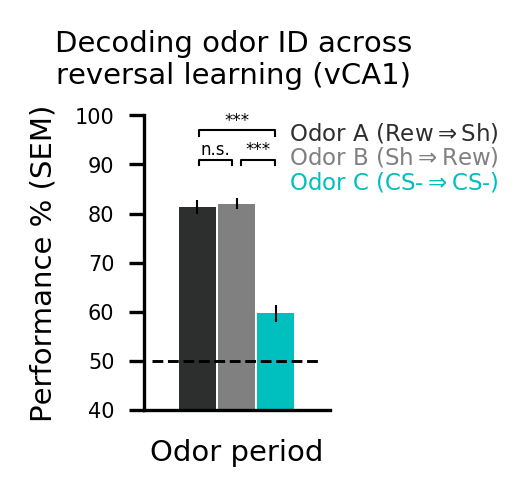

In [179]:
labels = ['Odor period']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
loops=10
#v={}
fig, ax = pl.subplots(figsize=(.8,1.3))
ax.bar(-.01 -width/2, np.mean(mean_odor_postVSpost_rev_tb_4_vs_tb_4_Rew_CS_vhpc[:loops])*100, width/2,color='#2D2E2E',label='CS1',
       yerr=np.array((np.std(mean_odor_postVSpost_rev_tb_4_vs_tb_4_Rew_CS_vhpc[:loops])/(np.sqrt(loops-1)))*100))
ax.bar(0, np.mean(mean_odor_postVSpost_rev_tb_4_vs_tb_4_Sh_CS_vhpc[:loops])*100, width/2,color='grey',label='CS2',
       yerr=np.array((np.std(mean_odor_postVSpost_rev_tb_4_vs_tb_4_Sh_CS_vhpc[:loops])/(np.sqrt(loops-1)))*100))
ax.bar(+.01+width/2, np.mean(mean_odor_postVSpost_rev_tb_4_vs_tb_4_CSm_vhpc[:loops])*100, width/2,color='c',label='CS-',
       yerr=np.array((np.std(mean_odor_postVSpost_rev_tb_4_vs_tb_4_CSm_vhpc[:loops])/(np.sqrt(loops-1)))*100))
#    ax.bar(i + .3, np.mean(eval("mean_odor_postVSpost_rev_tb_8_vs_tb_8_%s"%(t))[:loops])*100, width, color='#02337D',label='CS-',yerr=np.array(np.std(eval("mean_odor_postVSpost_rev_tb_8_vs_tb_8_%s"%(t))[:loops])*100))
#ax.legend(['odor','trace'],loc=[.8,.6])
ax.hlines(50,-.4,.4, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance % (SEM)')
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=7)
ax.tick_params(axis='x',bottom=False)
ax.set_ylim(40,100)
ax.text(.25,100-5,"Odor A (Rew$\Rightarrow$Sh)",color="#2D2E2E",fontsize=5.5)
ax.text(.25,95-5,"Odor B (Sh$\Rightarrow$Rew)",color="gray",fontsize=5.5)
ax.text(.25,90-5,"Odor C (CS-$\Rightarrow$CS-)",color="c",fontsize=5.5)


pvs=[]
tb=4
pvs.append(add_significance(ax, eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_Rew_CS_vhpc"%(tb,tb))[:loops],
    eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_Sh_CS_vhpc"%(tb,tb))[:loops],-.18,-.02,87-p,mcc=2))
pvs.append(add_significance(ax, eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_CSm_vhpc"%(tb,tb))[:loops],
    eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_Sh_CS_vhpc"%(tb,tb))[:loops],.02,.18,87-p,mcc=2))
pvs.append(add_significance(ax, eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_CSm_vhpc"%(tb,tb))[:loops],
    eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_Rew_CS_vhpc"%(tb,tb))[:loops],-.18,.18,93-p,mcc=2))
pl.suptitle('Decoding odor ID across\nreversal learning (vCA1)',y=1.1,fontsize=7)

fig.savefig('../figures/%s_Xsess_bars_CS_vCA1.pdf'%NOTEBOOK_NAME)

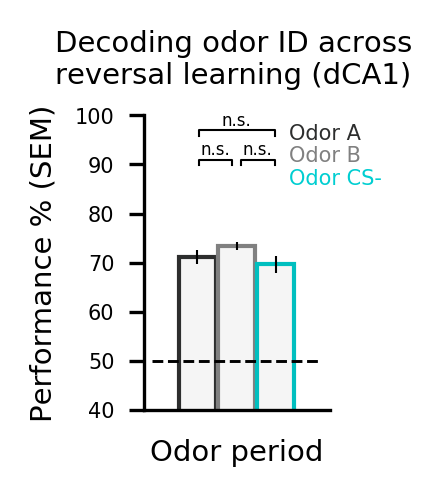

In [180]:
labels = ['Odor period']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
loops=10
#v={}
fig, ax = pl.subplots(figsize=(.8,1.3))
ax.bar(-.01 -width/2, np.mean(mean_odor_postVSpost_rev_tb_4_vs_tb_4_Rew_CS_dhpc[:loops])*100, width/2,color='whitesmoke',edgecolor='#2D2E2E',label='CS1',
       yerr=np.array((np.std(mean_odor_postVSpost_rev_tb_4_vs_tb_4_Rew_CS_dhpc[:loops])/(np.sqrt(loops-1)))*100))
ax.bar(0, np.mean(mean_odor_postVSpost_rev_tb_4_vs_tb_4_Sh_CS_dhpc[:loops])*100, width/2,color='whitesmoke',edgecolor='grey',label='CS2',
       yerr=np.array((np.std(mean_odor_postVSpost_rev_tb_4_vs_tb_4_Sh_CS_dhpc[:loops])/(np.sqrt(loops-1)))*100))
ax.bar(+.01+width/2, np.mean(mean_odor_postVSpost_rev_tb_4_vs_tb_4_CSm_dhpc[:loops])*100, width/2,color='whitesmoke',edgecolor='c',label='CS-',
       yerr=np.array((np.std(mean_odor_postVSpost_rev_tb_4_vs_tb_4_CSm_dhpc[:loops])/(np.sqrt(loops-1)))*100))
#    ax.bar(i + .3, np.mean(eval("mean_odor_postVSpost_rev_tb_8_vs_tb_8_%s"%(t))[:loops])*100, width, color='#02337D',label='CS-',yerr=np.array(np.std(eval("mean_odor_postVSpost_rev_tb_8_vs_tb_8_%s"%(t))[:loops])*100))
#ax.legend(['odor','trace'],loc=[.8,.6])
ax.hlines(50,-.4,.4, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance % (SEM)')
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=7)
ax.tick_params(axis='x',bottom=False)
ax.set_ylim(40,100)
ax.text(.25,100-5,"Odor A",color="#2D2E2E",fontsize=5)
ax.text(.25,95.5-5,"Odor B",color="grey",fontsize=5)
ax.text(.25,91-5,"Odor CS-",color="darkturquoise",fontsize=5)

pvs=[]
tb=4
pvs.append(add_significance(ax, eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_Rew_CS_dhpc"%(tb,tb))[:loops],
    eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_Sh_CS_dhpc"%(tb,tb))[:loops],-.18,-.02,87-p,mcc=2))
pvs.append(add_significance(ax, eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_CSm_dhpc"%(tb,tb))[:loops],
    eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_Sh_CS_dhpc"%(tb,tb))[:loops],.02,.18,87-p,mcc=2))
pvs.append(add_significance(ax, eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_CSm_dhpc"%(tb,tb))[:loops],
    eval("mean_odor_postVSpost_rev_tb_%s_vs_tb_%s_Rew_CS_dhpc"%(tb,tb))[:loops],-.18,.18,93-p,mcc=2))
pl.suptitle('Decoding odor ID across\nreversal learning (dCA1)',y=1.1,fontsize=7)

fig.savefig('../figures/%s_Xsess_bars_CS_dCA1.pdf'%NOTEBOOK_NAME)

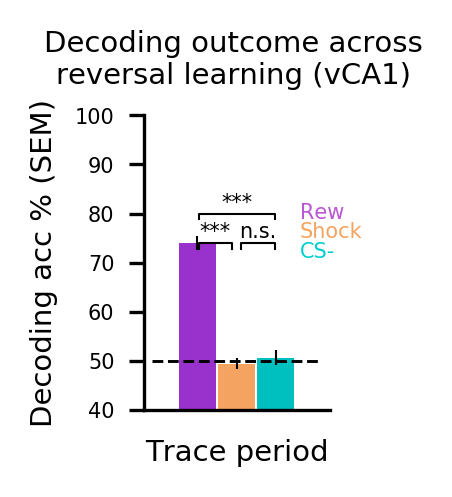

In [16]:
labels = ['Trace period']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
loops=10
#v={}
fig, ax = pl.subplots(figsize=(.8,1.3))

ax.bar(-.01 -width/2, np.mean(mean_outcome_postVSpost_rev_tb_6_vs_tb_6_Rew_vhpc[:loops])*100, width/2,color='darkorchid',label='CS1',
       yerr=np.array((np.std(mean_outcome_postVSpost_rev_tb_6_vs_tb_6_Rew_vhpc[:loops])/(np.sqrt(loops-1)))*100))
ax.bar(0, np.mean(mean_outcome_postVSpost_rev_tb_6_vs_tb_6_Sh_vhpc[:loops])*100, width/2,color='sandybrown',label='CS2',
       yerr=np.array((np.std(mean_outcome_postVSpost_rev_tb_6_vs_tb_6_Sh_vhpc[:loops])/(np.sqrt(loops-1)))*100))
ax.bar(+.01+width/2, np.mean(mean_outcome_postVSpost_rev_tb_6_vs_tb_6_CSm_vhpc[:loops])*100, width/2,color='c',label='CS-',
       yerr=np.array((np.std(mean_outcome_postVSpost_rev_tb_6_vs_tb_6_CSm_vhpc[:loops])/(np.sqrt(loops-1)))*100))
#    ax.bar(i + .3, np.mean(eval("mean_odor_postVSpost_rev_tb_8_vs_tb_8_%s"%(t))[:loops])*100, width, color='#02337D',label='CS-',yerr=np.array(np.std(eval("mean_odor_postVSpost_rev_tb_8_vs_tb_8_%s"%(t))[:loops])*100))
#ax.legend(['odor','trace'],loc=[.8,.6])
ax.hlines(50,-.4,.4, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc % (SEM)')
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=7)
ax.tick_params(axis='x',bottom=False)
ax.set_ylim(40,100)
ax.text(.3,96-17,"Rew",color="mediumorchid",fontsize=5)
ax.text(.3,92-17,"Shock",color="sandybrown",fontsize=5)
ax.text(.3,88-17,"CS-",color="darkturquoise",fontsize=5)

pvs=[]
tb=6
pvs.append(add_significance(ax, eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Rew_vhpc"%(tb,tb))[:loops],
    eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Sh_vhpc"%(tb,tb))[:loops],-.18,-.02,87-p,mcc=2))
pvs.append(add_significance(ax, eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Sh_vhpc"%(tb,tb))[:loops],
    eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Sh_vhpc"%(tb,tb))[:loops],.02,.18,87-p,mcc=2))
pvs.append(add_significance(ax, eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_CSm_vhpc"%(tb,tb))[:loops],
    eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Rew_vhpc"%(tb,tb))[:loops],-.18,.18,93-p,mcc=2))
pl.suptitle('Decoding outcome across\nreversal learning (vCA1)',y=1.1,fontsize=7)

fig.savefig('../figures/%s_Xsess_bars_tr_vCA1.pdf'%NOTEBOOK_NAME)

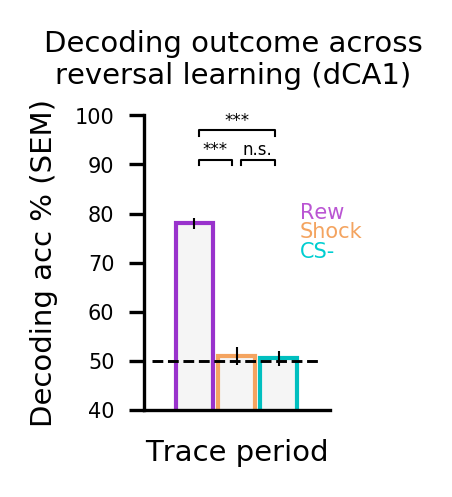

In [182]:
labels = ['Trace period']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
loops=10
#v={}
fig, ax = pl.subplots(figsize=(.8,1.3))

ax.bar(-.025 -width/2, np.mean(mean_outcome_postVSpost_rev_tb_6_vs_tb_6_Rew_dhpc[:loops])*100, width/2,color='whitesmoke',edgecolor='darkorchid',label='CS1',
       yerr=np.array((np.std(mean_outcome_postVSpost_rev_tb_6_vs_tb_6_Rew_dhpc[:loops])/(np.sqrt(loops-1)))*100))
ax.bar(0, np.mean(mean_outcome_postVSpost_rev_tb_6_vs_tb_6_Sh_dhpc[:loops])*100, width/2,color='whitesmoke',edgecolor='sandybrown',label='CS2',
       yerr=np.array((np.std(mean_outcome_postVSpost_rev_tb_6_vs_tb_6_Sh_dhpc[:loops])/(np.sqrt(loops-1)))*100))
ax.bar(+.025+width/2, np.mean(mean_outcome_postVSpost_rev_tb_6_vs_tb_6_CSm_dhpc[:loops])*100, width/2,color='whitesmoke',edgecolor='c',label='CS-',
       yerr=np.array((np.std(mean_outcome_postVSpost_rev_tb_6_vs_tb_6_CSm_dhpc[:loops])/(np.sqrt(loops-1)))*100))
#    ax.bar(i + .3, np.mean(eval("mean_odor_postVSpost_rev_tb_8_vs_tb_8_%s"%(t))[:loops])*100, width, color='#02337D',label='CS-',yerr=np.array(np.std(eval("mean_odor_postVSpost_rev_tb_8_vs_tb_8_%s"%(t))[:loops])*100))
#ax.legend(['odor','trace'],loc=[.8,.6])
ax.hlines(50,-.4,.4, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc % (SEM)')
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=7)
ax.tick_params(axis='x',bottom=False)
ax.set_ylim(40,100)
ax.text(.3,96-17,"Rew",color="mediumorchid",fontsize=5)
ax.text(.3,92-17,"Shock",color="sandybrown",fontsize=5)
ax.text(.3,88-17,"CS-",color="darkturquoise",fontsize=5)

pvs=[]
tb=6
pvs.append(add_significance(ax, eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Rew_dhpc"%(tb,tb))[:loops],
    eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Sh_dhpc"%(tb,tb))[:loops],-.18,-.02,87-p,mcc=2))
pvs.append(add_significance(ax, eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Sh_dhpc"%(tb,tb))[:loops],
    eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Sh_dhpc"%(tb,tb))[:loops],.02,.18,87-p,mcc=2))
pvs.append(add_significance(ax, eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_CSm_dhpc"%(tb,tb))[:loops],
    eval("mean_outcome_postVSpost_rev_tb_%s_vs_tb_%s_Rew_dhpc"%(tb,tb))[:loops],-.18,.18,93-p,mcc=2))
pl.suptitle('Decoding outcome across\nreversal learning (dCA1)',y=1.1,fontsize=7)

fig.savefig('../figures/%s_Xsess_bars_tr_dCA1.pdf'%NOTEBOOK_NAME)

In [183]:
save_workspace(db)

Could not store variable 'sstats'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'pl'. Skipping...
